# 0. Theory
## Heat Equation

\begin{equation}
  \frac{\partial y}{\partial t} = \sigma (t,x) \frac{\partial^2 y}{\partial x^2}
\end{equation}

$\sigma(t,x)$ is an arbitrary function.
Firstly, lets assume, that $\sigma (t,x) = \Sigma$ = const.

#### Crank-Nicolson method

We use the scheme:
\begin{equation}
  w_{i, \nu + 1} - w_{i, \nu} = \frac{\lambda}{2}(w_{i + 1, \nu} - 2w_{i, \nu} + w_{i - 1, \nu} + w_{i + 1, \nu + 1} - 2w_{i, \nu + 1} + w_{i - 1, \nu + 1})
\end{equation}

with the convergence rate $O(\Delta \tau^2, \Delta x^2)$ and unconditional stability.

This can be rewritten as $A w^{(\nu + 1)} = B w^{(\nu)} $ where:
\begin{equation}
   A = \left(
    \begin{array}{ccccc}
      1 + \lambda & -\lambda/2 & 0 & \ldots & 0 \\
      -\lambda/2 & 1 + \lambda & \ddots & \ddots & \vdots \\
      0 & \ddots & \ddots & \ddots & 0 \\
      \vdots & \ddots & \ddots & \ddots & -\lambda/2 \\
      0 & \ldots & 0 & -\lambda/2 & 1 + \lambda
    \end{array}
  \right),
  B = \left(
    \begin{array}{ccccc}
      1 - \lambda & \lambda/2 & 0 & \ldots & 0 \\
      \lambda/2 & 1 - \lambda & \ddots & \ddots & \vdots \\
      0 & \ddots & \ddots & \ddots & 0 \\
      \vdots & \ddots & \ddots & \ddots & \lambda/2 \\
      0 & \ldots & 0 & \lambda/2 & 1 - \lambda
    \end{array}
  \right)
\end{equation}

Accordingly, we choose boundary conditions:
\begin{equation}
\begin{aligned}
  &w_{0, \nu} = r_1(\tau, x) \\
  &w_{m, \nu} = r_2(\tau, x)
\end{aligned}
\end{equation}
where $y(\tau, x) \rightarrow r_1(\tau, x)$ for $x \rightarrow -\infty$ and $y(\tau, x) \rightarrow r_2(\tau, x)$ for $x \rightarrow +\infty$.

With those boundary conditions, we have to solve at each step:
$$
A w^{(\nu + 1)} = B w^{(\nu)} + d^{(\nu)}
$$

where

\begin{equation}
  d^{(\nu)} = \frac{\lambda}{2} \left(
    \begin{array}{c}
      w_{0, \nu} + w_{0, \nu + 1} \\
      0\\
      \vdots \\
      0 \\
      w_{m, \nu} + w_{m, \nu + 1}
    \end{array}
  \right)
\end{equation}

## Adjoint methods (AAD)

Given the output $\mathbf{x} \in \mathbb{R}^M$ of a complicated computation, such as the solution of a discretized PDE or some other set of $M$ equations, parameterized by $P$ variables $\mathbf{p}$ (design parameters, a.k.a. control variables or decision parameters), we often wish to compute some function $g(\mathbf{x}, \mathbf{p})$ based on the parameters and the solution.

For example, if we solve a wave equation, we might want to know the scattered power in some direction. Or, for a mechanical simulation, we might want to know the load-bearing capacity of the structure. For the output of a neural network, $g$ might be the "loss" function comparing a prediction $\mathbf{x}$ to data.

Often, however, we want to know more than just the value of $g$-we also want to know its gradient $\frac{d g}{d \mathbf{p}}$.
Adjoint methods give an efficient way to evaluate $\frac{d g}{d \mathbf{p}}$, with a cost independent of $P$ and usually comparable to the cost of solving for $\mathbf{x}$ once.


#### Linear systems

Suppose that the column-vector $\mathbf{x}$ solves the $M \times M$ linear equation, where we take $\mathbf{b}$ and $A$ to be real ${ }^1$ and to depend in some way on $\mathbf{p}$
$$A \mathbf{x}=\mathbf{b}$$

To evaluate the gradient directly, we would do

$$
\frac{d g}{d \mathbf{p}}=g_{\mathbf{p}}+g_{\mathbf{x}} \mathbf{x}_{\mathbf{p}}
$$

where the subscripts indicate partial derivatives $\left(g_{\mathbf{x}}\right.$ is a row vector, $\mathbf{x}_{\mathbf{p}}$ is an $M \times P$ matrix, etc.). Since $g$ is a given function, $g_{\mathbf{p}}$ and $g_{\mathbf{x}}$ are presumably easy to compute. On the other hand, computing $\mathbf{x}_{\mathbf{p}}$ is hard: evaluating it directly by differentiating $A \mathbf{x}=\mathbf{b}$ by a parameter $p_i$ gives:

$$\mathbf{x}_{p_i} = A^{-1}\left(\mathbf{b}_{p_i}-A_{p_i} \mathbf{x}\right)$$

That is, we would have to solve an $M \times$ $M$ linear equation for $P$ right-hand sides, once for every compont of $\mathbf{p}$; this is impractical if $P$ and $M$ are large.
More explicitly, the problematic term is:

$$
g_{\mathbf{x}} \mathbf{x}_{\mathbf{p}}=\underbrace{g_{\mathbf{x}}}_{1 \times M}[\underbrace{A^{-1}}_{M \times M} \underbrace{\left(\mathbf{b}_{\mathbf{p}}-A_{\mathbf{p}} \mathbf{x}\right)}_{M \times P}]=\underbrace{\left[g_{\mathbf{x}} A^{-1}\right]}_{1 \times M} \underbrace{\left(\mathbf{b}_{\mathbf{p}}-A_{\mathbf{p}} \mathbf{x}\right)}_{M \times P},
$$

If we multiply $\lambda^T=g_{\mathbf{x}} A^{-1}$ first, that corresponds to only a single solution of an adjoint equation:

$$
A^T \boldsymbol{\lambda}=g_{\mathbf{x}}^T .
$$

and then we multiply a single vector $\boldsymbol{\lambda}^T$ by our $M \times P$ matrix for only $\theta(M P)$ work. Putting it all together, we obtain:

$$
\left.\frac{d g}{d \mathbf{p}}\right|_{\mathbf{f}=0}=g_{\mathbf{p}}-\boldsymbol{\lambda}^T \mathbf{f}_{\mathbf{p}}=g_{\mathbf{p}}-\boldsymbol{\lambda}^T\left(A_{\mathbf{p}} \mathbf{x}-\mathbf{b}_{\mathbf{p}}\right)
$$

#### Recurrence relations

In this note, we derive an adjoint method for sensitivity analysis of the solution of recurrence relations. In particular, we suppose that we have a $M$-component vector $\mathbf{x}$ that is determined by iterating a recurrence relation

$$
\mathbf{x}^n=\mathbf{f}\left(\mathbf{x}^{n-1}, \mathbf{p}, n\right) \triangleq \mathbf{f}^n
$$

for some function $\mathbf{f}$ depending on the previous $\mathbf{x},{ }^1$ a vector $\mathbf{p}$ of $P$ parameters, and the step index $n$. The initial condition is

$$
\mathbf{x}^0=\mathbf{b}(\mathbf{p})
$$

for some given function $\mathbf{b}$ of the parameters. Furthermore, we have some function $g$ of x:

$$
g^n \triangleq g\left(\mathbf{x}^n, \mathbf{p}, n\right)
$$

and we wish to compute the gradient $\frac{d g^N}{d \mathbf{p}}$ of $g^N$, for some $N$, with respect to the parameters $\mathbf{p}$.

The gradient of $g^N$ can be written EXPLICITLY as:

$$
\frac{d g^N}{d \mathbf{p}}=g_{\mathbf{p}}^N+g_{\mathbf{x}}^N\left(\mathbf{f}_{\mathbf{p}}^{\mathrm{N}}+\mathbf{f}_{\mathbf{x}}^{\mathrm{N}}\left[\mathbf{f}_{\mathbf{p}}^{\mathrm{N}-1}+\mathbf{f}_{\mathbf{x}}^{\mathrm{N}-1}\left\{\mathbf{f}_{\mathbf{p}}^{\mathrm{N}-2}+\cdots\right\}\right]\right)
$$


This computation can also be reformulated in for of adjoint recurrence relation for with $M$-component column vector $\lambda^n$, recurring backwards from $n=N$ to $n=0$ :

$$
\lambda^{n-1}=\left(\mathbf{f}_{\mathbf{x}}^n\right)^T \lambda^n,
$$

where $T$ is the transpose, with "initial" condition

$$
\lambda^N=\left(g_{\mathbf{x}}^N\right)^T .
$$

In terms of this adjoint vector, the gradient becomes:

$$
\frac{d g^N}{d \mathbf{p}}=g_{\mathbf{p}}^N+\sum_{n=1}^N\left(\lambda^n\right)^T \mathbf{f}_{\mathbf{p}}^n+\left(\lambda^0\right)^T \mathbf{b}_{\mathbf{p}}
$$


## Middle-stage problem

Evaluate $ \frac{\partial y}{\partial \sigma} $ via Adjoint method (and compare it to one calculated with finite differences)

# 1. Solving heat equation via Crank-Nicolson

In [1]:
from docs.quant.heat_equation.heat_solver import *

### Setting function for Sigma

In [2]:
sigma_func = lambda x, t: x**2 + (t-0.5)**2 + 0.1
# creating grid
solver = HeatSolver(100, 200, sigma=1, xLeft=-1.0, xRight=1.0)
# setting sigma on grid
solver.set_sigma(sigma_func)

surface = go.Surface(z=solver.sigma_net, x=solver.tGrid, y=solver.xGrid)
fig = go.Figure(surface)
fig.update_layout(title='sigma', autosize=False, width=1200, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_scenes(xaxis_title_text='t', yaxis_title_text='x')
fig.show()

### Solving heat equation

In [3]:
solver.CN()
solver.backup() # cashing
solver.plot3D()

D:\Code\Python\noaMrFendel\docs\quant\utils\optlib\numerical_utils.py:125: NumbaPerformanceWarning:

np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))

D:\Code\Python\noaMrFendel\docs\quant\utils\optlib\numerical_utils.py:125: NumbaPerformanceWarning:

np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))



### Sensitivities via Finite Differences

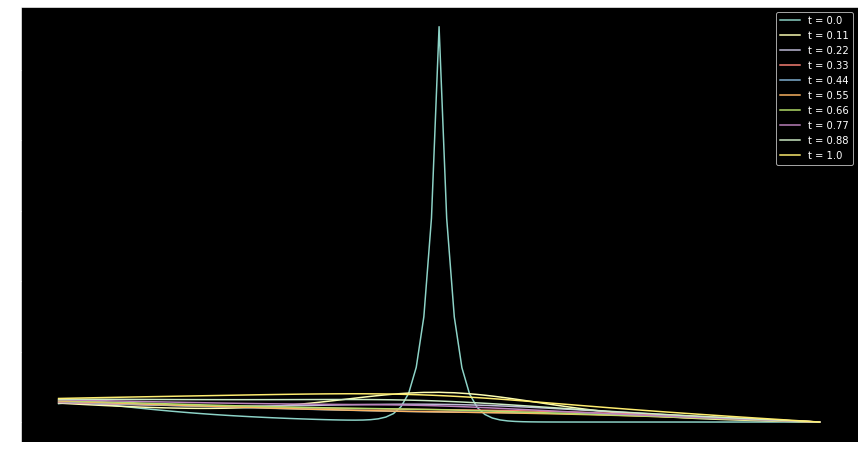

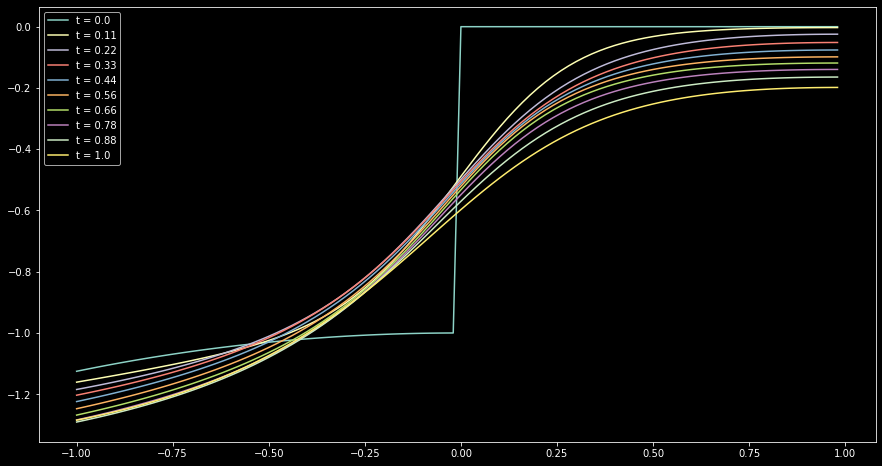

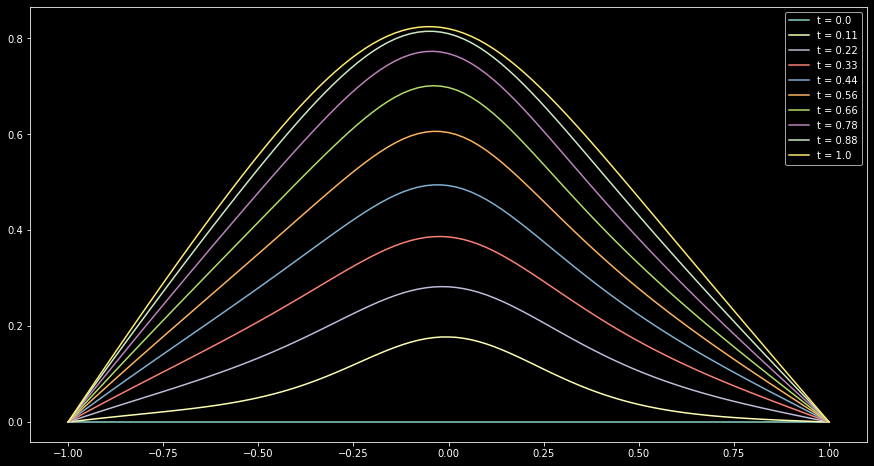

In [4]:
# sensitivity by time
solver.diff_t()
solver.plot(slice_num=10, mod=Mode.DIFF_T)
solver.plot3D(mod=Mode.DIFF_T)
# sensitivity by x
solver.diff_x()
solver.plot(slice_num=10, mod=Mode.DIFF_X)
solver.plot3D(mod=Mode.DIFF_X)
# sensitivity by sigma
solver.diff_sigma()
solver.plot(slice_num=10, mod=Mode.DIFF_C)
solver.plot3D(mod=Mode.DIFF_C)

# 2. Additional Theory
## Obstacle Problem
#### "Free Boundary Problem"

Consider an "obstacle" $g$ satisfying $b$ $g>0$ for a subinterval of $-1<x<1, g \in C^2, g^{\prime \prime} \leq 0, g(-1)<0$ and $g(1)<0$.
A function $y \in C^1$ with minimal length, and with $y(-1)=y(1)=0$ and $y \geq g$ for the $g$ of the figure can be characterized as follows: There is $\alpha, \beta$ such that
$$
\begin{array}{rll}
-1<x<\alpha: & y^{\prime \prime}=0 & (y>g) \\
\alpha<x<\beta: & y=g & \left(y^{\prime \prime}=g^{\prime \prime} \leq 0\right) \\
\beta<x<1: & y^{\prime \prime}=0 & (y>g)
\end{array}
$$
This expresses a complementarity in the sense of
in case $y-g>0$, then $y^{\prime \prime}=0$,
in case $y-g=0$, then $y^{\prime \prime} \leq 0$.

For the simple obstacle problem an equivalent formulation is
Find a function $y$ such that
$$
\begin{aligned}
& y^{\prime \prime}(y-g)=0, \quad-y^{\prime \prime} \geq 0, \quad y-g \geq 0, \\
& y(-1)=y(1)=0, y \in \mathcal{C}^1[-1,1]
\end{aligned}
$$
In this version, $\alpha$ and $\beta$ do not occur explicitly. After the numerical solution, the values of $\alpha$ and $\beta$ will become apparent.

$$
\left.\begin{array}{r}
\left(\frac{\partial y}{\partial t} - \sigma(t,x)\frac{\partial^2 y}{\partial x^2}\right)(y-g)=0 \\
\frac{\partial y}{\partial t} - \sigma(t,x) \frac{\partial^2 y}{\partial x^2} \geq 0 \\
y-g \geq 0
\end{array}\right\}
$$

where $g$ corresponds to the obstacle form. For example (option's payoff in terms of heat equation):
$$
g(t, x) = \exp \left(\frac{1}{4}(k+1)^{2}t\right) \left(e^{(k-1)x/2} - e^{(k+1)x/2} \right)^{+}
$$

for $ k = 0 $ obstacle function becomes:
$$
g(t, x) = \exp \left(\frac{t}{4}\right) \left(e^{-x/2} - e^{x/2} \right)^{+}
$$

#### Brennan-Schwarz algorithm

The algorithm is based on a Gaussian elimination where the early
exercise constraint is handled in a simple manner.
At each time step $\nu$, the problem needs to be solved:
$$
\left\{\begin{array}{c}
Aw^{(\nu+1)} \geq b^{(\nu)} \\
w^{(\nu+1)} \geq g \\
\left(Aw^{(\nu+1)}-b^{(\nu)}\right)^T\left(w^{(\nu+1)}-g\right)=0
\end{array}\right.
$$

The algorithm is the following: The Gaussian elimination transforms rows of the system of linear equations
$Aw=b$ to the form:
$$
p_i w_i+s_i w_{i+1}=k_i, \ \ \ (*)
$$
for $i=1, \ldots, m$, where the coefficients can be chosen to be
$$
\begin{gathered}
p_1=a_{11}, \quad s_1=a_{12}, \quad k_1=b_1 \\
p_i=a_{i i}-\frac{a_{i i-1}}{p_{i-1}} a_{i-1 i}, \quad s_i=a_{i i+1}, \quad k_i=b_i-\frac{a_{i i-1}}{p_{i-1}} k_{i-1} \\
p_m=a_{m m}-\frac{a_{m m-1}}{p_{m-1}} a_{m-1 m} \quad \text { and } \quad k_m=b_m-\frac{p_{m-1}}{a_{m m-1}} k_{m-1}
\end{gathered}
$$

The solution $y$ for the system of inequalities above is obtained by using the equation (*) and the payoff
function of the put option.
Starting by solving from $i = m$, if $w_m$ is less than the payoff value then set $w_m = g_m$. Then to solve $w_{m−1}$ and so on...

## Main Problem

Derive the Adjoint equation for Brennan Schwarz Algorithm, combined with Crank Nickolson Scheme and implement it.